# Week 11 Quiz

## Lili Tan - lt2846

### Instructions

Replace the Name and UNI in cell above and the notebook name

Replace all '____' below using the instructions provided.

When completed, 
 - make sure you've replaced Name and UNI in the first cell and filename (eg: week_11_quiz-hw2592)
 - Click the github link shared on canvas for quiz11 to generate your own repository of quiz11
 - Click your own repository of quiz11 to commit your answers to github

The MNIST digits dataset is a dataset commonly used to demonstrate image recognition. 

The dataset is composed of a set of images of handwritten digits from 0 to 9. There are 1797
images, each 8x8 pixels. If we flatten each image we get a dataset of 1797 observations, each with 64
features, each belonging to one of 10 classes.

In this quiz we'll see how well these images cluster using KMeans clustering.
We'll compare the KMeans clustering assingments to clusters generated by HAC with Ward linkage.

### Setup Environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Dataset

In [2]:
# From sklearn datasets import load_digits.
from sklearn.datasets import load_digits

# Load the dataset into 'digits' using load_digits
digits = load_digits()

# Extract digits['data'] to X_digits. No need to reshape as each image has already been flattened to 1x64
X_digits = digits['data']

# Extract the labels in digits['target'] to y_digits
y_digits = digits['target']

# Assert that the shape of X_digits is 1797 rows, 64 columns
assert X_digits.shape == (1797,64)

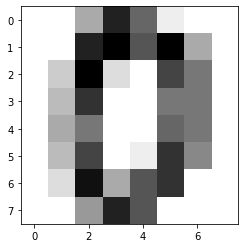

In [3]:
# We can use plt.imshow() to display one of the images as an example.
# 'digits['images']' is a list of images of size 8x8 pixels.
# We can plot the first image using plt.imshow with cmap=plt.cm.gray_r
# You should see a black '0' on a white background.
plt.imshow(digits['images'][0], cmap=plt.cm.gray_r);

In [4]:
# First we'll reduce our dataset from 64 to 2 dimensions using PCA

# Import PCA from sklearn
from sklearn.decomposition import PCA

# Instantiate a pca object that will result in 2 components being returned.
#   Use n_components=2, random_state=123
# Store as 'pca'.
pca = PCA(n_components=2,random_state=123)

# Transform X_digits to 2D using fit_transform.
# Store as X_2D.
X_2D = pca.fit_transform(X_digits)
X_2D = pd.DataFrame(X_2D, columns=["component"+str(i) for i in range(2)])

# assert that the dataset has been reduced to 2 dimensions
assert X_2D.shape[1] == 2

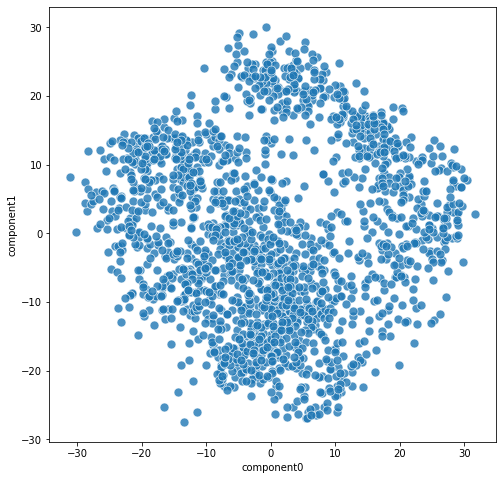

In [5]:
# Create a scatterplot of X_2D
# First, create a fig and axis with figsize=(8,8)
# Use sns.scatterplot to plot X_2D with 
#   s=80 to make each point a larger size
#   alpha=.8 to make points slightly transparent
fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.scatterplot(x='component0',y='component1',data=X_2D,ax=ax,s=80,alpha=.8);

In [6]:
# Cluster the data using KMeans

# Import KMeans from sklearn
from sklearn.cluster import KMeans

# Intantiate a KMeans object which will generate 10 clusters.
# Use init='k-means++' and random_state=123
# Store as 'km'.
km = KMeans(n_clusters=10, init='k-means++', random_state=123)

# Use .fit_predict() on X_digits to both fit our k-means model and generate cluster assignments.
# Store the result as cluster_assignments.
cluster_assignments = km.fit_predict(X_digits)

# print the first 10 cluster assignments
cluster_assignments[0:10]

array([7, 4, 4, 6, 8, 3, 0, 1, 4, 3], dtype=int32)

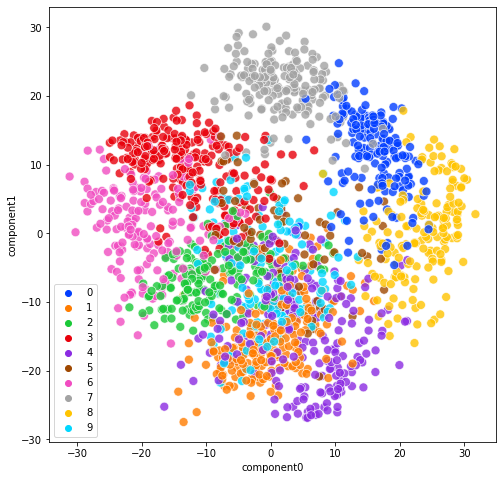

In [7]:
# Plot X_2D as a scatterplot colored by their cluster assignments
# Note that the legend shows cluster assignment, not digit label
# First, create a fig and axis with figsize=(8,8)
# Use the same size and alpha argument settings as above, but additionally set
#   hue=cluster_assignments to color each point by it's cluster assignment
#   palette='bright' to use a brighter color palette than the seaborn default
# Note that, since we are clustering in 64 dimensional space, the clusters will
#   appear to overlap in 2 dimensional space
fig,ax = plt.subplots(1,1,figsize=(8,8))
sns.scatterplot(x='component0',y='component1',data=X_2D,ax=ax,s=80,alpha=.8,
                hue=cluster_assignments,palette='bright');

In [8]:
# Which digits were placed in cluster 0?
# Since we actually have labels for these images we can see which 
#   digits were placed in cluster 0 without looking at the images themselves.
# The cluster is composed mostly of images of the same number.
unique, counts = np.unique(y_digits[cluster_assignments==0], return_counts=True)
print(np.asarray((unique, counts)).T)
print("6 were placed in cluster 0")

[[  1   2]
 [  5   1]
 [  6 177]
 [  8   2]]
6 were placed in cluster 0


In [9]:
# sklearn has a metric homogeneity_score which measures the homogeneity of clusters
# It returns a value between 0 and 1, where a higher value means more homogeneous.
# Compare the clustering assignments of Kmeans found above with an HAC model using Ward linkage
#
# Refer to the documentation here:
#   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html

# import homogeneity_score from sklearn.metrics
from sklearn.metrics import homogeneity_score

# import AgglomerativeClustering from sklearn.cluster
from sklearn.cluster import AgglomerativeClustering

# generate cluster predictions with AgglomerativeClustering using n_clusters=10 and linkage='ward'
# store as clustering_HAC
clustering_HAC = AgglomerativeClustering(n_clusters=10,linkage='ward').fit_predict(X_digits)

#Print the homogeneity scores for the clustering assigned by KMeans
print(f'homogeneity score for KMeans: {homogeneity_score(y_digits,cluster_assignments):0.2f}')

#Print the homeogeneity score for the clustering assinged by Agglomerative Clustering
print(f'homogeneity score for HAC   : {homogeneity_score(y_digits,clustering_HAC):0.2f}')

homogeneity score for KMeans: 0.74
homogeneity score for HAC   : 0.86
